**Student Name: Nhan D. Nguyen (Jimmy)**

**Student ID: 169825**

**Final Project:**
- Using linear regression to predict machine failure code from scratch, to pre-built libraries, and in TensorFlow for comparisons

In [1]:
import tensorflow as tf
from tensorflow.contrib import autograph #import autograph from contrib package to use graph mode
%load_ext tensorboard
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import seaborn as sns
from scipy import stats 
from scipy import linalg

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
print(tf.__version__)

1.15.0


-----

**Training Dataset**

In [3]:
df = pd.read_csv('Machine_Failure_Training_Set.csv')
df.head()

,Temperature,x-acc,y-acc,z-acc,Pressure,Load,Flow,Unnamed: 7,Unnamed: 8,Nitrogen,Unnamed: 10,Unnamed: 11,Frequency,Unnamed: 13,Unnamed: 14,Failure Alert,Diagnostic Code
0,149,118,136,113,113,105,-1,-1,1,-1,-1,1,-1,-1,1,1,4
1,171,218,83,265,222,129,-1,1,-1,-1,1,-1,-1,1,-1,-1,0
2,295,267,177,160,317,216,-1,1,-1,1,-1,-1,-1,1,-1,-1,2
3,102,155,147,266,197,119,-1,1,-1,-1,1,-1,1,-1,-1,1,3
4,129,143,169,134,131,101,-1,-1,1,-1,-1,1,-1,-1,1,1,4


In [4]:
df.describe()

,Temperature,x-acc,y-acc,z-acc,Pressure,Load,Flow,Unnamed: 7,Unnamed: 8,Nitrogen,Unnamed: 10,Unnamed: 11,Frequency,Unnamed: 13,Unnamed: 14,Failure Alert,Diagnostic Code
count,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000
mean,183.905303,183.839091,183.207273,184.262424,183.675909,184.090000,-0.999091,0.671212,-0.672121,-0.373030,0.040606,-0.667576,0.022121,-0.356667,-0.665455,0.000000,2.500000
std,51.372999,48.836192,54.650993,49.778438,49.266894,54.026948,0.042634,0.741321,0.740497,0.927889,0.999251,0.744598,0.999831,0.934302,0.746495,1.000076,1.707955
min,20.000000,39.000000,4.000000,11.000000,1.000000,9.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,147.000000,146.000000,143.000000,151.000000,151.000000,142.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
50%,184.000000,185.000000,181.000000,184.000000,183.000000,185.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,0.000000,2.500000
75%,220.000000,219.000000,220.000000,217.000000,215.000000,224.000000,-1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,4.000000
max,372.000000,335.000000,395.000000,379.000000,366.000000,356.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


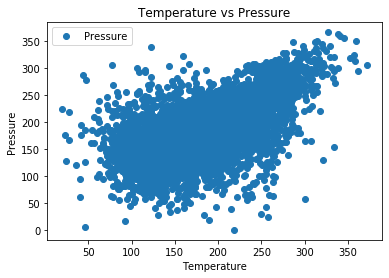

In [5]:
df.plot(x='Temperature', y='Pressure', style='o')  
plt.title('Temperature vs Pressure')  
plt.xlabel('Temperature')  
plt.ylabel('Pressure')  
plt.show()

In [6]:
df.loc[:,['Temperature','Pressure']]

,Temperature,Pressure
0,149,113
1,171,222
2,295,317
3,102,197
4,129,131
...,...,...
6595,172,182
6596,220,178
6597,277,269
6598,184,192


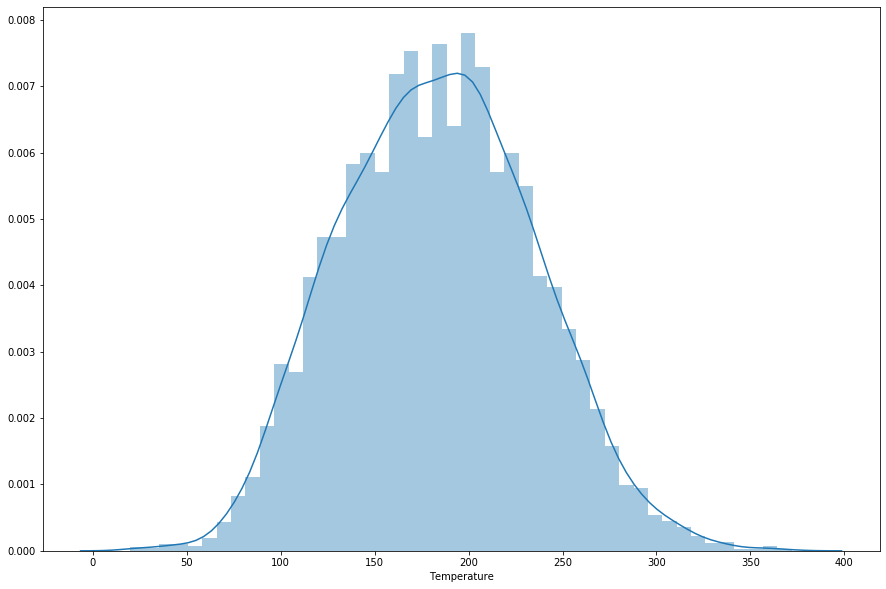

In [7]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['Temperature'])

### Linear Regression from Scratch:
- Split up Training and Testing Sets

In [8]:
X = df[df.columns[:-2]]
T = df[df.columns[-2]];T

0       1
1      -1
2      -1
3       1
4       1
       ..
6595    1
6596    1
6597   -1
6598   -1
6599    1
Name: Failure Alert, Length: 6600, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.2, random_state=0)

---------
**Solving for the Weights**

In [10]:
X_train = np.array(X_train)
y_train= np.array(y_train)

In [11]:
X_train

array([[209, 131, 158, ...,   1,  -1,  -1],
       [239, 211, 180, ...,  -1,   1,  -1],
       [127, 231, 202, ...,   1,  -1,  -1],
       ...,
       [259, 251, 166, ...,  -1,   1,  -1],
       [188, 207, 152, ...,   1,  -1,  -1],
       [247, 173, 146, ...,   1,  -1,  -1]])

In [12]:
y_train.shape

(5280,)

**Adding Xa (Adding Noise or B0)**

In [13]:
Xa = []
for i in X_train:
    random = np.random.normal()
    Xa.append(np.append(arr = random, values = i))
Xa = np.array(Xa);
print(Xa); print(Xa.shape)


[[-1.35252222e-01  2.09000000e+02  1.31000000e+02 ...  1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 [ 5.09480062e-02  2.39000000e+02  2.11000000e+02 ... -1.00000000e+00
   1.00000000e+00 -1.00000000e+00]
 [ 4.60469149e-01  1.27000000e+02  2.31000000e+02 ...  1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 ...
 [-1.05094813e+00  2.59000000e+02  2.51000000e+02 ... -1.00000000e+00
   1.00000000e+00 -1.00000000e+00]
 [-8.15503003e-01  1.88000000e+02  2.07000000e+02 ...  1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 [-2.47560115e-01  2.47000000e+02  1.73000000e+02 ...  1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]]
(5280, 16)


**Finding the pseudoinverse of X**

In [14]:
Xpinv = np.linalg.pinv(Xa);
print(Xpinv); print(Xa.shape)

[[-2.19709352e-05  2.47763329e-05  6.58342201e-05 ... -1.97224905e-04
  -1.48050026e-04 -4.92335013e-05]
 [-8.47136046e-08  1.00342959e-06 -5.28006274e-06 ...  6.73582995e-06
  -3.24170556e-06  1.75553329e-05]
 [-6.74476551e-06 -2.62733007e-07  6.64443170e-06 ...  5.93091005e-06
   2.27236700e-06  1.74739013e-08]
 ...
 [-6.21220497e-05 -2.83041820e-04  2.42371473e-04 ...  1.20138511e-04
   2.65040702e-04 -3.01856578e-04]
 [-1.57745376e-04 -1.15375495e-04  9.93873931e-05 ...  2.28294188e-04
  -2.05621016e-03 -3.19685085e-04]
 [-2.78464451e-04 -3.68776539e-04  1.73129162e-04 ...  2.15392435e-04
  -2.19034638e-04 -7.46178108e-04]]
(5280, 16)


**Weights = Xa pseudoinverse *  T**

In [15]:
W = np.multiply(Xpinv, y_train)
print(W); print(W.shape)

[[ 2.19709352e-05 -2.47763329e-05  6.58342201e-05 ...  1.97224905e-04
  -1.48050026e-04  4.92335013e-05]
 [ 8.47136046e-08 -1.00342959e-06 -5.28006274e-06 ... -6.73582995e-06
  -3.24170556e-06 -1.75553329e-05]
 [ 6.74476551e-06  2.62733007e-07  6.64443170e-06 ... -5.93091005e-06
   2.27236700e-06 -1.74739013e-08]
 ...
 [ 6.21220497e-05  2.83041820e-04  2.42371473e-04 ... -1.20138511e-04
   2.65040702e-04  3.01856578e-04]
 [ 1.57745376e-04  1.15375495e-04  9.93873931e-05 ... -2.28294188e-04
  -2.05621016e-03  3.19685085e-04]
 [ 2.78464451e-04  3.68776539e-04  1.73129162e-04 ... -2.15392435e-04
  -2.19034638e-04  7.46178108e-04]]
(16, 5280)


**Fitting the model with our weights**

In [16]:
labels = []
for i in range(len(Xa)):
    tot = np.sum(Xa[i,:] * W[:,i])
    if tot > 0:
        labels.append(1)
    else:
        labels.append(-1)

In [17]:
dict_labels = {'actual': y_train,'predicted': labels} 
pd.DataFrame.from_dict(dict_labels)

,actual,predicted
0,-1,-1
1,-1,-1
2,1,1
3,1,1
4,1,1
...,...,...
5275,-1,-1
5276,1,1
5277,-1,-1
5278,1,1


**Testing Set**

In [18]:
def test_linear_classifier(X_test, test_weights):
    labels = []
    for i in range(len(X_test)):
        tot = np.sum(X_test[i,:] * test_weights[:,i])
        if tot > 0:
            labels.append(1.0)
        else:
            labels.append(-1.0)
    return np.array(labels)


In [19]:
test_weights = np.delete(W,0, axis=0)[:,:len(X_test)]

In [20]:
test_weights.shape

(15, 1320)

In [21]:
X_test.shape

(1320, 15)

In [22]:
X_test = np.array(X_test)

In [23]:
y_pred = test_linear_classifier(X_test, test_weights)

In [24]:
pd.Series(y_pred)

0      -1.0
1      -1.0
2       1.0
3      -1.0
4      -1.0
       ... 
1315    1.0
1316    1.0
1317    1.0
1318    1.0
1319    1.0
Length: 1320, dtype: float64

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8772727272727273
Mean Squared Error: 1.7545454545454546
Root Mean Squared Error: 1.3245925617130176


In [26]:
from sklearn.metrics import confusion_matrix
y_true = y_test
CM = confusion_matrix(y_true, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

accuracy = (TP + TN)/(TP + FP + FN + TN); print(accuracy);
sensitivity = TP/ (TP + FN); print(sensitivity);
specificity = TN / (FP + TN); print(specificity);
ppv = TP/ (FP +TP); print(ppv)

0.5613636363636364
0.5708092485549133
0.5509554140127388
0.5834564254062038


-----

### **Using Sklearn with a Linear Regression Model to predict the labels**

In [27]:
X2 = df[df.columns[:-2]]
X2.head()

,Temperature,x-acc,y-acc,z-acc,Pressure,Load,Flow,Unnamed: 7,Unnamed: 8,Nitrogen,Unnamed: 10,Unnamed: 11,Frequency,Unnamed: 13,Unnamed: 14
0,149,118,136,113,113,105,-1,-1,1,-1,-1,1,-1,-1,1
1,171,218,83,265,222,129,-1,1,-1,-1,1,-1,-1,1,-1
2,295,267,177,160,317,216,-1,1,-1,1,-1,-1,-1,1,-1
3,102,155,147,266,197,119,-1,1,-1,-1,1,-1,1,-1,-1
4,129,143,169,134,131,101,-1,-1,1,-1,-1,1,-1,-1,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X2, T, test_size=0.2, random_state=0)

In [29]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

-0.5664435600562548
[ 0.00053733  0.0010346   0.00053974  0.00052247  0.00043639  0.00088264
  0.0124526  -0.037547    0.0250944  -0.22797275  0.14843886  0.07953389
 -0.0429585  -0.38665558  0.42961408]


In [31]:
coeff_df = pd.DataFrame(regressor.coef_, X2.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Temperature,0.000537
x-acc,0.001035
y-acc,0.000540
z-acc,0.000522
Pressure,0.000436
Load,0.000883
Flow,0.012453
Unnamed: 7,-0.037547
Unnamed: 8,0.025094
Nitrogen,-0.227973


In [32]:
y_pred = regressor.predict(X_test)


In [33]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

def labels(x):
    if x > 0:
        return 1
    else:
        return -1

df2['Predicted'] = df2['Predicted'].apply(labels)
df2

,Actual,Predicted
4676,1,1
578,-1,-1
1362,-1,1
5628,-1,1
4045,1,1
...,...,...
2843,1,1
5220,1,1
5002,1,1
5222,-1,-1


In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5276776232339981
Mean Squared Error: 0.4880349931935686
Root Mean Squared Error: 0.6985950137193713


In [35]:
y2_actual = np.array(df2['Actual'])
y2_test = np.array(df2['Predicted'])

In [36]:
from sklearn.metrics import confusion_matrix
y_test
CM = confusion_matrix(y2_actual, y2_test)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

accuracy = (TP + TN)/(TP + FP + FN + TN); print(accuracy);
sensitivity = TP/ (TP + FN); print(sensitivity);
specificity = TN / (FP + TN); print(specificity);
ppv = TP/ (FP +TP); print(ppv)

0.818939393939394
0.9869942196531792
0.6337579617834395
0.7480832420591457


----

### Using TensorFlow to predict Linear Regression**

In [37]:
df = pd.read_csv('Machine_Failure_Training_Set.csv');

# Separate the 'predictors' (aka 'features') from the dependent variable (aka 'label') that we will learn how to predict
machine_data = np.array(df)[:,:15]
machine_target = np.array(df)[:,15]; df.head()


,Temperature,x-acc,y-acc,z-acc,Pressure,Load,Flow,Unnamed: 7,Unnamed: 8,Nitrogen,Unnamed: 10,Unnamed: 11,Frequency,Unnamed: 13,Unnamed: 14,Failure Alert,Diagnostic Code
0,149,118,136,113,113,105,-1,-1,1,-1,-1,1,-1,-1,1,1,4
1,171,218,83,265,222,129,-1,1,-1,-1,1,-1,-1,1,-1,-1,0
2,295,267,177,160,317,216,-1,1,-1,1,-1,-1,-1,1,-1,-1,2
3,102,155,147,266,197,119,-1,1,-1,-1,1,-1,1,-1,-1,1,3
4,129,143,169,134,131,101,-1,-1,1,-1,-1,1,-1,-1,1,1,4


In [38]:
machine_data

array([[149, 118, 136, ...,  -1,  -1,   1],
       [171, 218,  83, ...,  -1,   1,  -1],
       [295, 267, 177, ...,  -1,   1,  -1],
       ...,
       [277, 238, 207, ...,  -1,   1,  -1],
       [184, 199, 200, ...,  -1,   1,  -1],
       [266, 231, 282, ...,   1,  -1,  -1]])

In [39]:
machine_target

array([ 1, -1, -1, ..., -1, -1,  1])

In [40]:
m, n = machine_data.shape
machine_data_plus_bias = np.c_[np.ones((m, 1)), machine_data];
print(machine_data_plus_bias)

[[  1. 149. 118. ...  -1.  -1.   1.]
 [  1. 171. 218. ...  -1.   1.  -1.]
 [  1. 295. 267. ...  -1.   1.  -1.]
 ...
 [  1. 277. 238. ...  -1.   1.  -1.]
 [  1. 184. 199. ...  -1.   1.  -1.]
 [  1. 266. 231. ...   1.  -1.  -1.]]


In [41]:
import tensorflow as tf

# Make the compute graph
X = tf.constant(machine_data_plus_bias, dtype=tf.float64, name="X")
XT = tf.transpose(X)
y = tf.constant(machine_target.reshape(-1, 1), dtype=tf.float64, name="y")

theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)



In [42]:
# Run the compute graph
with tf.Session() as sess:
    theta_value = theta.eval()
    print(theta_value)

[[ 1.68642637e+14]
 [-5.52127297e-03]
 [-2.43073970e-03]
 [-4.98868895e-04]
 [-5.66101949e-03]
 [-2.42968948e-03]
 [ 1.38149780e-04]
 [ 9.69649712e+13]
 [ 9.69649712e+13]
 [ 9.69649712e+13]
 [ 7.16776661e+13]
 [ 7.16776661e+13]
 [ 7.16776661e+13]
 [ 2.55699158e-01]
 [-2.90275574e-01]
 [ 5.65765381e-01]]


In [43]:
model = tf.Variable(tf.constant(theta_value, dtype=tf.float64), name="model")

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as saver_sess:
    init.run()
    theta_value = model.eval()
    save_path = saver.save(saver_sess, "../final_project/TensorFlow/Final Project Linear Regression.ckpt")
    file_writer = tf.summary.FileWriter('../final_project/TensorFlow/graphs', sess.graph)
    file_writer.close()




In [44]:
!ls "../final_project/TensorFlow/"

Final Project Linear Regression.ckpt.data-00000-of-00001
Final Project Linear Regression.ckpt.index
Final Project Linear Regression.ckpt.meta
checkpoint
graphs


In [45]:


sess_restore = tf.Session()

saver = tf.train.import_meta_graph('../final_project/TensorFlow/Final Project Linear Regression.ckpt.meta')
saver.restore(sess_restore,tf.train.latest_checkpoint('../final_project/TensorFlow/'))

theta_value = sess_restore.run('model:0')


sess_restore.close()


In [46]:
predicted_value = theta_value[0][0]
linear_coefficients = theta_value[1:]
for j, c in enumerate(linear_coefficients):
    predicted_value += c[:] * machine_data[:][j]

In [47]:
linear_coefficients[1:]

array([[-2.43073970e-03],
       [-4.98868895e-04],
       [-5.66101949e-03],
       [-2.42968948e-03],
       [ 1.38149780e-04],
       [ 9.69649712e+13],
       [ 9.69649712e+13],
       [ 9.69649712e+13],
       [ 7.16776661e+13],
       [ 7.16776661e+13],
       [ 7.16776661e+13],
       [ 2.55699158e-01],
       [-2.90275574e-01],
       [ 5.65765381e-01]])

In [48]:
def labels(x):
    if x > 0:
        return 1
    else:
        return -1
    
y_pred = pd.Series(theta_value.flatten()).apply(labels)[1:]
y_pred

1    -1
2    -1
3    -1
4    -1
5    -1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14   -1
15    1
dtype: int64

In [49]:
y_actual = machine_target[:15]

In [50]:
dict2 = {"actual":y_actual, "predicted":y_pred}

In [51]:
pd.DataFrame(dict2)

,actual,predicted
1,1,-1
2,-1,-1
3,-1,-1
4,1,-1
5,1,-1
6,-1,1
7,1,1
8,-1,1
9,1,1
10,1,1


In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_actual, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_actual, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))

Mean Absolute Error: 0.9333333333333333
Mean Squared Error: 1.8666666666666667
Root Mean Squared Error: 1.3662601021279464


In [53]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_actual, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

accuracy = (TP + TN)/(TP + FP + FN + TN); print(accuracy);
sensitivity = TP/ (TP + FN); print(sensitivity);
specificity = TN / (FP + TN); print(specificity);
ppv = TP/ (FP +TP); print(ppv)

0.5333333333333333
0.6
0.4
0.6666666666666666


In [54]:
tensorboard --logdir="../final_project/TensorFlow/graphs" --port=8008

Reusing TensorBoard on port 8008 (pid 16457), started 0:00:31 ago. (Use '!kill 16457' to kill it.)